In [108]:
import meop
from importlib import reload
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import numpy as np
reload(meop)
dir(meop)

['N_PARAM',
 'Path',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add_N_PARAM',
 'add_method',
 'add_mld',
 'add_sigma0',
 'cartopy',
 'ccrs',
 'central_longitude',
 'cfeature',
 'cmo',
 'copy_file',
 'deployment_from_smru_name',
 'fname_plots',
 'fname_prof',
 'gsw',
 'list_fname_plots',
 'list_fname_prof',
 'list_metadata',
 'list_smru_name',
 'meop',
 'np',
 'os',
 'pd',
 'plot_TSdiag',
 'plot_TSsections',
 'plot_data_tags',
 'plot_map',
 'plot_profiles',
 'plot_sections',
 'plt',
 'processdir',
 'read_list_deployment',
 'read_list_deployment_hr',
 'read_ncfile',
 'shutil',
 'warnings',
 'wraps',
 'xr']

In [10]:
depl = 'ft22'
list_files=['ft22-874-18', 'ft22-875-18', 'ft22-882-18', 'ft22-876-18',
       'ft22-881-18', 'ft22-686-18', 'ft22-873-18', 'ft22-878-18',
       'ft22-879-18']

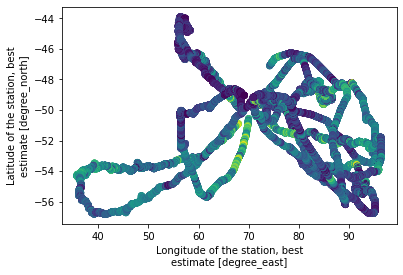

In [11]:
# how to use a list
list_ds = []
qf = 'fr1'
for smru_name in list_files:    
    file_name = smru_name+'_'+qf+'_prof.nc'
    list_ds.append(meop.read_ncfile(Path.home() / Path(depl) / Path(file_name)))

fig, ax = plt.subplots(1,1)
for ds in list_ds:
    ds.add_mld()
    ds.plot.scatter(x='LONGITUDE',y='LATITUDE',hue='MLD_ADJUSTED',ax=ax,add_guide=False)
    ds.close()

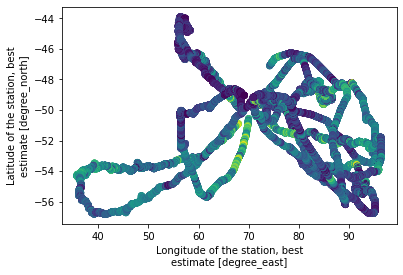

In [12]:
# do it without list
fig, ax = plt.subplots(1,1)
qf = 'fr1'
for smru_name in list_files:    
    file_name = smru_name+'_'+qf+'_prof.nc'
    ds = meop.read_ncfile(Path.home() / Path(depl) / Path(file_name))
    ds.add_mld()
    ds.plot.scatter(x='LONGITUDE',y='LATITUDE',hue='MLD_ADJUSTED',ax=ax,add_guide=False)
    ds.close()

In [48]:
list_df=[]
qf = 'fr1'
for smru_name in list_files:
    
    file_name = smru_name+'_'+qf+'_prof.nc'
    ds = meop.read_ncfile(Path.home() / Path(depl) / Path(file_name))
    ds.add_mld()
    
    df = ds[['LATITUDE','LONGITUDE','JULD','MLD_ADJUSTED']].to_dataframe()
    df.insert(loc=0, column='smru_name', value=smru_name)
    df = df.reset_index()
    
    list_df.append(df)
    ds.close()

df = pd.concat(list_df,ignore_index=True)

In [67]:
df['year'] = df.JULD.apply(lambda x: x.year)
df['month'] = df.JULD.apply(lambda x: x.month)
df['day'] = df.JULD.apply(lambda x: x.day)
df.to_csv(depl+'_mld.csv',index=False)

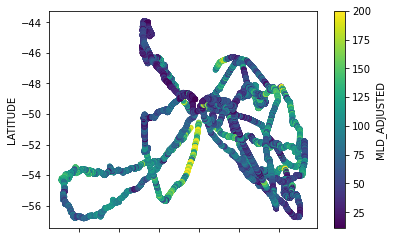

In [39]:
df.plot.scatter(x='LONGITUDE',y='LATITUDE',c='MLD_ADJUSTED',cmap='viridis',vmax=200)

In [36]:
df.groupby('smru_name').MLD_ADJUSTED.describe()

,count,mean,std,min,25%,50%,75%,max
smru_name,,,,,,,,
ft22-686-18,4250.0,49.762825,28.618097,11.0,31.0,43.0,60.0,212.0
ft22-873-18,5715.0,81.371826,43.701298,11.0,53.0,73.0,105.0,245.0
ft22-874-18,5473.0,95.336563,29.942526,12.0,75.0,96.0,116.0,213.0
ft22-875-18,4387.0,83.601776,39.203079,11.0,52.0,84.0,112.0,262.0
ft22-876-18,6164.0,70.834358,31.893427,11.0,47.0,67.0,93.0,215.0
ft22-878-18,4787.0,76.577400,30.056740,11.0,56.0,75.0,96.0,183.0
ft22-879-18,5085.0,74.073746,32.502197,11.0,51.0,71.0,94.0,219.0
ft22-881-18,4126.0,81.399902,33.852474,12.0,54.0,79.0,106.0,196.0
ft22-882-18,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df['month'] = df.JULD.apply(lambda x: x.month)

In [58]:
df.groupby('month').MLD_ADJUSTED.describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,2316.0,51.920120,22.526264,11.0,36.0,51.0,67.0,132.0
10,4879.0,97.611809,46.493217,11.0,61.0,93.0,128.0,245.0
11,17048.0,85.967911,35.207359,11.0,60.0,87.0,112.0,262.0
12,15744.0,64.704903,27.896385,11.0,44.0,63.0,83.0,171.0


month
1     AxesSubplot(0.125,0.125;0.62x0.755)
10    AxesSubplot(0.125,0.125;0.62x0.755)
11    AxesSubplot(0.125,0.125;0.62x0.755)
12    AxesSubplot(0.125,0.125;0.62x0.755)
dtype: object

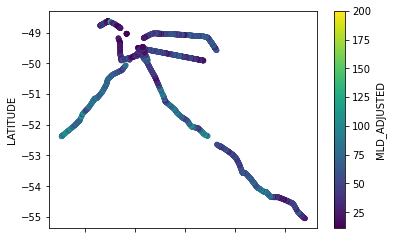

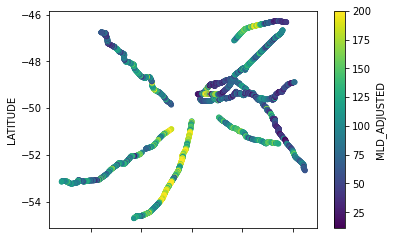

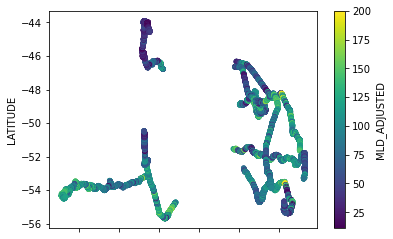

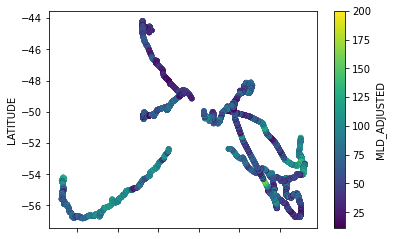

In [63]:
df.groupby('month').plot.scatter(x='LONGITUDE',y='LATITUDE',c='MLD_ADJUSTED',cmap='viridis',vmax=200)

In [70]:
df.dropna(subset=['MLD_ADJUSTED'])

,N_PROF,smru_name,LATITUDE,LONGITUDE,JULD,MLD_ADJUSTED,month,year,day
22,22,ft22-874-18,-50.893454,67.994930,2018-10-23 21:40:42.000001,192.0,10,2018,23
23,23,ft22-874-18,-50.902745,67.964178,2018-10-23 21:59:05.999998,188.0,10,2018,23
24,24,ft22-874-18,-50.911937,67.933759,2018-10-23 22:17:18,178.0,10,2018,23
25,25,ft22-874-18,-50.921178,67.903174,2018-10-23 22:35:35.999998,185.0,10,2018,23
29,29,ft22-874-18,-50.952370,67.799941,2018-10-23 23:37:22.000003,199.0,10,2018,23
...,...,...,...,...,...,...,...,...,...
44344,5513,ft22-879-18,-49.171082,70.904751,2019-01-08 03:59:18.000003,13.0,1,2019,8
44345,5514,ft22-879-18,-49.173369,70.892223,2019-01-08 04:11:53.999996,18.0,1,2019,8
44346,5515,ft22-879-18,-49.175662,70.879662,2019-01-08 04:24:31.999999,23.0,1,2019,8
44347,5516,ft22-879-18,-49.177834,70.867765,2019-01-08 04:36:29.999997,31.0,1,2019,8


In [110]:
# how to bin data
def bin_mld(df,xbins,ybins):
    import scipy.stats as stats

    data = df.dropna(subset=['MLD_ADJUSTED']).MLD_ADJUSTED.values
    x = df.dropna(subset=['MLD_ADJUSTED']).LONGITUDE.values
    y = df.dropna(subset=['MLD_ADJUSTED']).LATITUDE.values

    statistic, xedges, yedges, binnumber = stats.binned_statistic_2d(
        x, y, values=data, statistic='mean', 
        bins=[xbins,ybins])
    ds = xr.Dataset({'MLD_ADJUSTED': xr.DataArray(dims=['LONGITUDE','LATITUDE'],coords={'LONGITUDE':xbins[:-1],'LATITUDE':ybins[:-1]},data=statistic.T)})
    return ds

NX, NY = 50, 50
xbins = np.linspace(20,100,NX)
ybins = np.linspace(-60,-40,NY)
ds_bin = bin_mld(df,xbins,ybins)
#plt.pcolormesh(xedges,yedges,statistic.T)

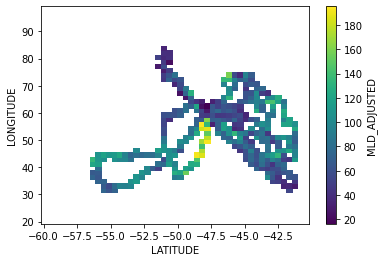

In [111]:
ds_bin.MLD_ADJUSTED.plot()

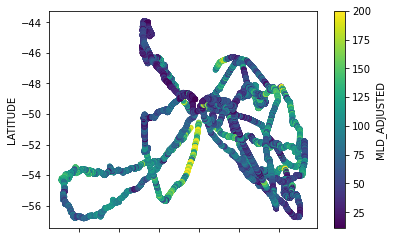

In [85]:
df.plot.scatter(x='LONGITUDE',y='LATITUDE',c='MLD_ADJUSTED',cmap='viridis',vmax=200)

In [77]:
[np.linspace(20,100,NX),np.linspace(-60,-40,NX)]

[array([ 20.,  40.,  60.,  80., 100.]), array([-60., -55., -50., -45., -40.])]

I needed to make sure that all datasets had the same variables, so i removed the MLD from two of the datasets:

In [30]:
ds[str(6)]=ds[str(6)].drop_vars('MLD')
ds[str(1)]=ds[str(1)].drop_vars('MLD')

Trying to find the dataset with the max number of profiles:

In [31]:
N_PROF=[]
for i in range(len(ds)):
    N_PROF=max(ds[str(i)].dims['N_PROF'])

TypeError: 'int' object is not iterable

Return the dataset that has the max number of profiles: 

In [ ]:
ds_max=[]
for i in range(len(ds)):
    ds_max=max(ds.N_PROF)

Try indexing?

In [52]:
int(ds[str(1)].N_PROF.max())

4678

In [53]:
N_PROF_ = np.zeros(len(ds))
for i in range(len(ds)):
    N_PROF_[i]=int(ds[str(i)].N_PROF.max())
N_PROF_

array([6242., 4678.,  947., 6716., 5298., 4306., 5842., 4794., 5517.])

In [62]:
N_PROF_.max()

6716.0

In [47]:
N_PROF = max((ds[str(0)].dims['N_PROF'], ds[str(1)].dims['N_PROF'], ds[str(2)].dims['N_PROF'], ds[str(3)].dims['N_PROF'], ds[str(4)].dims['N_PROF'], ds[str(5)].dims['N_PROF'], ds[str(6)].dims['N_PROF'], ds[str(7)].dims['N_PROF'], ds[str(8)].dims['N_PROF']))
mld = np.zeros(shape=(len(ds),N_PROF))
for i,j in range(N_PROF, len(ds)):
    pressure = dn[str(j)].PRES[i,:].values
    temperature = dn[str(j)].TEMP_ADJUSTED[i,:].values
    salinity = dn[str(j)].PSAL_ADJUSTED[i,:].values
    index_t = np.isnan(temperature).argmin(axis=0)
    index_s = np.isnan(salinity).argmin(axis=0)
    temperature[:index_t]=temperature[index_t+1]
    salinity[:index_s]=salinity[index_s+1]
    if ~np.isnan(np.nansum(salinity)):
        density = gsw.sigma0(salinity,temperature)
        dens10 = density[9]
        ii = np.argmax(density-dens10>0.02)
        mld[i] = pressure[ii]
mld[mld<5]=np.nan
mld

<xarray.DataArray 'N_PROF' (N_PROF: 5518)>
array([   0,    1,    2, ..., 5515, 5516, 5517])
Coordinates:
  * N_PROF   (N_PROF) int64 0 1 2 3 4 5 6 ... 5511 5512 5513 5514 5515 5516 5517

In [35]:
N_PROF

6717

Now to make sure all the datasets have the same number of N_PROF, by create 'blank' columns for those with less than the dataset with max number of profiles:

Just trying them individually to see if the idea works...

In [34]:
N_PROF = max((ds[str(0)].dims['N_PROF'], ds[str(1)].dims['N_PROF'], ds[str(2)].dims['N_PROF'], ds[str(3)].dims['N_PROF'], ds[str(4)].dims['N_PROF'], ds[str(5)].dims['N_PROF'], ds[str(6)].dims['N_PROF'], ds[str(7)].dims['N_PROF'], ds[str(8)].dims['N_PROF']))
diff=N_PROF-ds[str(8)].dims['N_PROF']
empty=xr.zeros_like(ds[str(3)], dtype=None)
dn={}
dn[str(8)]=xr.concat([ds[str(8)], empty.sel(N_PROF=slice(0,diff-1))], dim='N_PROF')
dn[str(8)]

<xarray.Dataset>
Dimensions:                       (N_CALIB: 1, N_LEVELS: 1000, N_PARAM: 5, N_PROF: 6717)
Coordinates:
  * N_LEVELS                      (N_LEVELS) int64 0 1 2 3 4 ... 996 997 998 999
  * N_CALIB                       (N_CALIB) int64 0
  * N_PARAM                       (N_PARAM) int64 0 1 2 3 4
  * N_PROF                        (N_PROF) int64 0 1 2 3 ... 1195 1196 1197 1198
Data variables:
    DATA_TYPE                     (N_PROF) object b'Argo profile    ' ... 0
    FORMAT_VERSION                (N_PROF) object b'3.0 ' b'3.0 ' ... 0 0
    HANDBOOK_VERSION              (N_PROF) object b'3.0 ' b'3.0 ' ... 0 0
    REFERENCE_DATE_TIME           (N_PROF) object b'19500101000000' ... 0
    DATE_CREATION                 (N_PROF) object b'20210317144104' ... 0
    DATE_UPDATE                   (N_PROF) object b'20210317144104' ... 0
    PLATFORM_NUMBER               (N_PROF) object b'00079488' b'00079488' ... 0
    PROJECT_NAME                  (N_PROF) object b'                         ...
    PI_NAME                       (N_PROF) object b'                         ...
    STATION_PARAMETERS            (N_PROF, N_PARAM) object b'PRES            ...
    CYCLE_NUMBER                  (N_PROF) float64 1.0 2.0 3.0 ... 0.0 0.0 0.0
    DIRECTION                     (N_PROF) object b'A' b'A' b'A' b'A' ... 0 0 0
    DATA_CENTRE                   (N_PROF) object b'IF' b'IF' b'IF' ... 0 0 0
    DC_REFERENCE                  (N_PROF) object b'                         ...
    DATA_STATE_INDICATOR          (N_PROF) object b'    ' b'    ' ... 0 0
    DATA_MODE                     (N_PROF) object b'D' b'D' b'D' b'D' ... 0 0 0
    INST_REFERENCE                (N_PROF) object b'                         ...
    WMO_INST_TYPE                 (N_PROF) object b'995 ' b'995 ' ... 0 0
    JULD                          (N_PROF) object 2018-10-21 11:04:31.999997 ...
    JULD_QC                       (N_PROF) object b'1' b'1' b'1' b'1' ... 0 0 0
    JULD_LOCATION                 (N_PROF) object 2018-10-21 11:04:31.999997 ...
    LATITUDE                      (N_PROF) float64 -49.38 -49.38 ... 0.0 0.0
    LONGITUDE                     (N_PROF) float64 70.8 70.81 70.82 ... 0.0 0.0
    POSITION_QC                   (N_PROF) object b'1' b'1' b'1' b'1' ... 0 0 0
    POSITIONING_SYSTEM            (N_PROF) object b'ARGOS   ' b'ARGOS   ' ... 0
    PROFILE_PRES_QC               (N_PROF) object b'A' b'A' b'A' b'A' ... 0 0 0
    PROFILE_PSAL_QC               (N_PROF) object b'A' b'A' b'A' b'A' ... 0 0 0
    PROFILE_TEMP_QC               (N_PROF) object b'A' b'A' b'A' b'A' ... 0 0 0
    PRES                          (N_PROF, N_LEVELS) float32 1.0 2.0 ... 0.0 0.0
    PRES_QC                       (N_PROF, N_LEVELS) object b'1' b'1' ... 0 0
    PRES_ADJUSTED                 (N_PROF, N_LEVELS) float32 1.0 2.0 ... 0.0 0.0
    PRES_ADJUSTED_QC              (N_PROF, N_LEVELS) object b'1' b'1' ... 0 0
    PRES_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 nan nan ... 0.0 0.0
    TEMP                          (N_PROF, N_LEVELS) float32 2.836678 ... 0.0
    TEMP_QC                       (N_PROF, N_LEVELS) object b'1' b'1' ... 0 0
    TEMP_ADJUSTED                 (N_PROF, N_LEVELS) float32 2.8457851 ... 0.0
    TEMP_ADJUSTED_QC              (N_PROF, N_LEVELS) object b'1' b'1' ... 0 0
    TEMP_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 0.05 0.05 ... 0.0
    PSAL                          (N_PROF, N_LEVELS) float32 33.64442 ... 0.0
    PSAL_QC                       (N_PROF, N_LEVELS) object b'1' b'1' ... 0 0
    PSAL_ADJUSTED                 (N_PROF, N_LEVELS) float32 33.639282 ... 0.0
    PSAL_ADJUSTED_QC              (N_PROF, N_LEVELS) object b'1' b'1' ... 0 0
    PSAL_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 0.05 0.05 ... 0.0
    PROFILE_CHLA_QC               (N_PROF) object b'A' b'A' b'A' b'A' ... 0 0 0
    CHLA                          (N_PROF, N_LEVELS) float32 nan nan ... 0.0 0.0
    CHLA_QC                       (N_PROF, N_LEVELS)

In [ ]:
N_PROF = max((ds[str(0)].dims['N_PROF'], ds[str(1)].dims['N_PROF'], ds[str(2)].dims['N_PROF'], ds[str(3)].dims['N_PROF'], ds[str(4)].dims['N_PROF'], ds[str(5)].dims['N_PROF'], ds[str(6)].dims['N_PROF'], ds[str(7)].dims['N_PROF'], ds[str(8)].dims['N_PROF']))
diff=N_PROF-ds[str(7)].dims['N_PROF']
empty=xr.zeros_like(ds[str(3)], dtype=None)
dn={}
dn[str(7)]=xr.concat([ds[str(7)], empty.sel(N_PROF=slice(0,diff-1))], dim='N_PROF')
dn[str(7)]

In [ ]:
N_PROF = max((ds[str(0)].dims['N_PROF'], ds[str(1)].dims['N_PROF'], ds[str(2)].dims['N_PROF'], ds[str(3)].dims['N_PROF'], ds[str(4)].dims['N_PROF'], ds[str(5)].dims['N_PROF'], ds[str(6)].dims['N_PROF'], ds[str(7)].dims['N_PROF'], ds[str(8)].dims['N_PROF']))
diff=N_PROF-ds[str(6)].dims['N_PROF']
empty=xr.zeros_like(ds[str(3)], dtype=None)
dn={}
dn[str(6)]=xr.concat([ds[str(6)], empty.sel(N_PROF=slice(0,diff-1))], dim='N_PROF')
dn[str(6)]

In [ ]:
N_PROF = max((ds[str(0)].dims['N_PROF'], ds[str(1)].dims['N_PROF'], ds[str(2)].dims['N_PROF'], ds[str(3)].dims['N_PROF'], ds[str(4)].dims['N_PROF'], ds[str(5)].dims['N_PROF'], ds[str(6)].dims['N_PROF'], ds[str(7)].dims['N_PROF'], ds[str(8)].dims['N_PROF']))
diff=N_PROF-ds[str(5)].dims['N_PROF']
empty=xr.zeros_like(ds[str(3)], dtype=None)
dn={}
dn[str(5)]=xr.concat([ds[str(5)], empty.sel(N_PROF=slice(0,diff-1))], dim='N_PROF')
dn[str(5)]

In [ ]:
N_PROF = max((ds[str(0)].dims['N_PROF'], ds[str(1)].dims['N_PROF'], ds[str(2)].dims['N_PROF'], ds[str(3)].dims['N_PROF'], ds[str(4)].dims['N_PROF'], ds[str(5)].dims['N_PROF'], ds[str(6)].dims['N_PROF'], ds[str(7)].dims['N_PROF'], ds[str(8)].dims['N_PROF']))
diff=N_PROF-ds[str(4)].dims['N_PROF']
empty=xr.zeros_like(ds[str(4)], dtype=None)
dn={}
dn[str(4)]=xr.concat([ds[str(4)], empty.sel(N_PROF=slice(0,diff-1))], dim='N_PROF')
dn[str(4)]

In [ ]:
N_PROF = max((ds[str(0)].dims['N_PROF'], ds[str(1)].dims['N_PROF'], ds[str(2)].dims['N_PROF'], ds[str(3)].dims['N_PROF'], ds[str(4)].dims['N_PROF'], ds[str(5)].dims['N_PROF'], ds[str(6)].dims['N_PROF'], ds[str(7)].dims['N_PROF'], ds[str(8)].dims['N_PROF']))
diff=N_PROF-ds[str(3)].dims['N_PROF']
empty=xr.zeros_like(ds[str(3)], dtype=None)
dn={}
dn[str(3)]=xr.concat([ds[str(3)], empty.sel(N_PROF=slice(0,diff-1))], dim='N_PROF')
dn[str(3)]

In [ ]:
N_PROF = max((ds[str(0)].dims['N_PROF'], ds[str(1)].dims['N_PROF'], ds[str(2)].dims['N_PROF'], ds[str(3)].dims['N_PROF'], ds[str(4)].dims['N_PROF'], ds[str(5)].dims['N_PROF'], ds[str(6)].dims['N_PROF'], ds[str(7)].dims['N_PROF'], ds[str(8)].dims['N_PROF']))
diff=N_PROF-ds[str(2)].dims['N_PROF']
empty=xr.zeros_like(ds[str(3)], dtype=None)
dn={}
dn[str(2)]=xr.concat([ds[str(2)], empty.sel(N_PROF=slice(0,diff-1))], dim='N_PROF')
dn[str(2)]

In [ ]:
N_PROF = max((ds[str(0)].dims['N_PROF'], ds[str(1)].dims['N_PROF'], ds[str(2)].dims['N_PROF'], ds[str(3)].dims['N_PROF'], ds[str(4)].dims['N_PROF'], ds[str(5)].dims['N_PROF'], ds[str(6)].dims['N_PROF'], ds[str(7)].dims['N_PROF'], ds[str(8)].dims['N_PROF']))
diff=N_PROF-ds[str(1)].dims['N_PROF']
empty=xr.zeros_like(ds[str(3)], dtype=None)
dn={}
dn[str(1)]=xr.concat([ds[str(1)], empty.sel(N_PROF=slice(0,diff-1))], dim='N_PROF')
dn[str(1)]

In [ ]:
N_PROF = max((ds[str(0)].dims['N_PROF'], ds[str(1)].dims['N_PROF'], ds[str(2)].dims['N_PROF'], ds[str(3)].dims['N_PROF'], ds[str(4)].dims['N_PROF'], ds[str(5)].dims['N_PROF'], ds[str(6)].dims['N_PROF'], ds[str(7)].dims['N_PROF'], ds[str(8)].dims['N_PROF']))
diff=N_PROF-ds[str(0)].dims['N_PROF']
empty=xr.zeros_like(ds[str(3)], dtype=None)
dn={}
dn[str(0)]=xr.concat([ds[str(0)], empty.sel(N_PROF=slice(0,diff-1))], dim='N_PROF')
dn[str(0)]

In [ ]:
ds[str(0)].dims['N_PROF'].values

Now, to make sure that all datasets are the same size, atleast in having the same number of profiles ( blank columns for those with under the maximum number of profiles in one dataset) i did the following: (at the moment this doesn't work, so I need to relook at it) 

In [ ]:
N_PROF = max((ds[str(0)].dims['N_PROF'], ds[str(1)].dims['N_PROF'], ds[str(2)].dims['N_PROF'], ds[str(3)].dims['N_PROF'], ds[str(4)].dims['N_PROF'], ds[str(5)].dims['N_PROF'], ds[str(6)].dims['N_PROF'], ds[str(7)].dims['N_PROF'], ds[str(8)].dims['N_PROF']))
dn={}
for i in range(len(ds)):
        diff=N_PROF-ds[str(i)].dims['N_PROF']
        empty=xr.zeros_like(ds[str(3)], dtype=None)
        dn[str(i)]=xr.concat([ds[str(i)], empty.sel(N_PROF=slice(0,diff))], dim='N_PROF')
dn[str(1)]

Now, to compute the MLD for each of the datasets and profilers within those datasets...  (this is still raw... was just testing out for one first, but now i realise that the range should either by number of files, or number of profiles... it cant be both... i need to use a nested loop i guess.. ) 

In [ ]:
temperature = dn[str(1)].TEMP_ADJUSTED[1,:].values

In [ ]:
N_PROF = max((ds[str(0)].dims['N_PROF'], ds[str(1)].dims['N_PROF'], ds[str(2)].dims['N_PROF'], ds[str(3)].dims['N_PROF'], ds[str(4)].dims['N_PROF'], ds[str(5)].dims['N_PROF'], ds[str(6)].dims['N_PROF'], ds[str(7)].dims['N_PROF'], ds[str(8)].dims['N_PROF']))
mld = np.zeros(shape=(len(ds),N_PROF))
for i,j in range(N_PROF, len(ds)):
    pressure = dn[str(j)].PRES[i,:].values
    temperature = dn[str(j)].TEMP_ADJUSTED[i,:].values
    salinity = dn[str(j)].PSAL_ADJUSTED[i,:].values
    index_t = np.isnan(temperature).argmin(axis=0)
    index_s = np.isnan(salinity).argmin(axis=0)
    temperature[:index_t]=temperature[index_t+1]
    salinity[:index_s]=salinity[index_s+1]
    if ~np.isnan(np.nansum(salinity)):
        density = gsw.sigma0(salinity,temperature)
        dens10 = density[9]
        ii = np.argmax(density-dens10>0.02)
        mld[i] = pressure[ii]
mld[mld<5]=np.nan
mld

In [ ]:
def mixed_layer_depth(ds, file_name):

# Compute MLD: The mixed layer depth (MLD) is determined as the depth where the density is higher than its value at 10 m by 0.02 kg m-3

    for i in range(ds[str(i)].dims['N_PROF']):
        N_PROF = ds[str(i)].dims['N_PROF']
        mld = np.zeros(N_PROF)
        pressure = ds[str(i)].PRES[i,:].values
        temperature = ds[str(i)].TEMP_ADJUSTED[i,:].values
        salinity = ds[str(i)].PSAL_ADJUSTED[i,:].values
        index_t = np.isnan(temperature).argmin(axis=0)
        index_s = np.isnan(salinity).argmin(axis=0)
        temperature[:index_t]=temperature[index_t+1]
        salinity[:index_s]=salinity[index_s+1]
        if ~np.isnan(np.nansum(salinity)):
            density = gsw.sigma0(salinity,temperature)
            dens10 = density[9]
            ii = np.argmax(density-dens10>0.02)
            mld[i] = pressure[ii]
    mld[mld<5] = np.nan

    # save mld in netcdf file
    import netCDF4
    ncfile = netCDF4.Dataset(file_name,mode='a')
    if not('MLD' in ncfile.variables ):
        ncmld = ncfile.createVariable('MLD', np.float32, ('N_PROF',))
        ncmld.units = 'm'
        ncmld.long_name = 'mixed layer depth 0.03kg/m3'
        ncmld[:] = mld
    else:
        ncfile['MLD'][:] = mld
    ncfile.close()

In [ ]:
#df1 =  df[df.SMRU_PLATFORM_CODE == 'ft22-873-18'].copy()
#df2 =  df[df.SMRU_PLATFORM_CODE == 'ft22-875-18'].copy()
#df3 =  df[df.SMRU_PLATFORM_CODE == 'ft22-876-18'].copy()
#df4 = pd.concat([df1,df2,df3])

In [ ]:
#df4.loc[(df.SMRU_PLATFORM_CODE=='ft22-873-18'),'mld'] = mixed[0]
#df4.loc[(df.SMRU_PLATFORM_CODE=='ft22-875-18'),'mld'] = mixed[1]
#df4.loc[(df.SMRU_PLATFORM_CODE=='ft22-876-18'),'mld'] = mixed[2]

In [ ]:
plt.scatter(df.LONGITUDE,df.LATITUDE,c=df.year)
plt.colorbar()

In [ ]:
meop_plot_data.plot_map_deployments(list_profiles_country,
                          groupby='COUNTRY',
                          title=f'Distribution of profiles by nation',
                          legend=True,
                          namefig='Global_distribution_by_nation.png',
                          folder=meop.processdir,
                         )

In [ ]:
meop_plot_data.plot_map_deployments(list_profiles,
                          groupby='DEPLOYMENT_CODE',
                          title=f'Distribution of profiles by deployment code',
                          legend=False,
                          namefig='Global_distribution_by_deployment.png',
                          folder=meop.processdir,
                         )

In [ ]:
print(list_profiles.MASK.value_counts())
meop_plot_data.plot_map_deployments(list_profiles,
                          groupby='MASK',
                          title=f'Distribution of profiles by regions',
                          legend=True,
                          namefig='Global_distribution_by_region1.png',
                          folder=meop.processdir,
                         )

In [ ]:
for region in list_tags.MASK.unique():
    index_tags = list_tags[list_tags.MASK==region].SMRU_PLATFORM_CODE
    meop_plot_data.plot_map_deployments(list_profiles[list_profiles.SMRU_PLATFORM_CODE.isin(index_tags)],
                              groupby='DEPLOYMENT_CODE',
                              title=f'Distribution of {region} profiles',
                              legend=False,
                              namefig=f'Regional_distribution_{region}.png',
                              folder=meop.processdir,
                             )

In [ ]:
list_tags.columns

In [ ]:
df_country = list_deployments[['DEPLOYMENT_CODE','COUNTRY']]
list_profiles_countries = list_profiles.merge(df_country,on='DEPLOYMENT_CODE')
for country in list_profiles_countries.COUNTRY.unique():
    list_profiles_country = list_profiles_countries[list_profiles_countries.COUNTRY==country]
    meop_plot_data.plot_map_deployments(list_profiles_country,
                              groupby='DEPLOYMENT_CODE',
                              title=f'Distribution of profiles for {country}',
                              legend=True,
                              namefig=f'Regional_distribution_{country}.png',
                              folder=meop.processdir,
                             )

In [ ]:
if 'continuous' not in list_profiles:
    list_profiles = list_profiles.merge(list_tags.set_index('SMRU_PLATFORM_CODE').continuous,on='SMRU_PLATFORM_CODE')
list_profiles_continuous = list_profiles.loc[list_profiles.continuous==1,:]

meop_plot_data.plot_map_deployments(list_profiles_continuous,
                          groupby='SMRU_PLATFORM_CODE',
                          title=f'Distribution of continuous recording profiles',
                          legend=False,
                          namefig='Global_distribution_SMS.png',
                          folder=meop.processdir,
                         )

In [ ]:
importlib.reload(meop_plot_data)
meop_plot_data.plot_map_stereo_south(list_profiles,
                          groupby='DEPLOYMENT_CODE',
                          title=f'Distribution of profiles by deployment code',
                          legend=False,
                          namefig=meop.processdir / 'Global_distribution_CTD_Southern_Ocean',
                         )

In [ ]:
meop_plot_data.plot_map_deployments(list_profiles[list_profiles.N_CHLA>0],
                                    groupby='DEPLOYMENT_CODE',
                                    title='Distribution of Fluorescence profiles',
                                    namefig=meop.processdir / 'global_map_chla_profiles.png'
                                   )

In [ ]:
selection = (list_profiles.JULD.apply(lambda x: x.year)>2015) & (list_profiles.LATITUDE<-63) \
     & (list_profiles.LONGITUDE>60)  & (list_profiles.LONGITUDE<80)
meop_plot_data.plot_map_deployments(list_profiles[selection],
                                    groupby='DEPLOYMENT_CODE',
                                    title='Distribution of southern profiles after 2018',
                                    namefig=meop.processdir / 'global_map_profiles_post2018.png'
                                   )